# KRW rates against USD and CAD


In [177]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
plt.style.use('seaborn')

In [179]:
df = yf.download('USDKRW=X, CADKRW=X', parse_dates=["Date"], index_col="Date")
df = df.Close
df

[*********************100%***********************]  2 of 2 completed


,CADKRW=X,USDKRW=X
Date,,
2003-12-01,918.719971,1198.400024
2003-12-02,921.409973,1195.000000
2003-12-03,917.010010,1192.500000
2003-12-04,907.510010,1190.099976
2003-12-05,908.460022,1184.699951
...,...,...
2022-06-23,1000.971924,1297.680054
2022-06-24,1000.739136,1299.810059
2022-06-27,998.790527,1288.290039


In [180]:
plt.rc('figure', figsize=(17, 8))
plt.rc('font', size=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=16)


<AxesSubplot:xlabel='Date'>

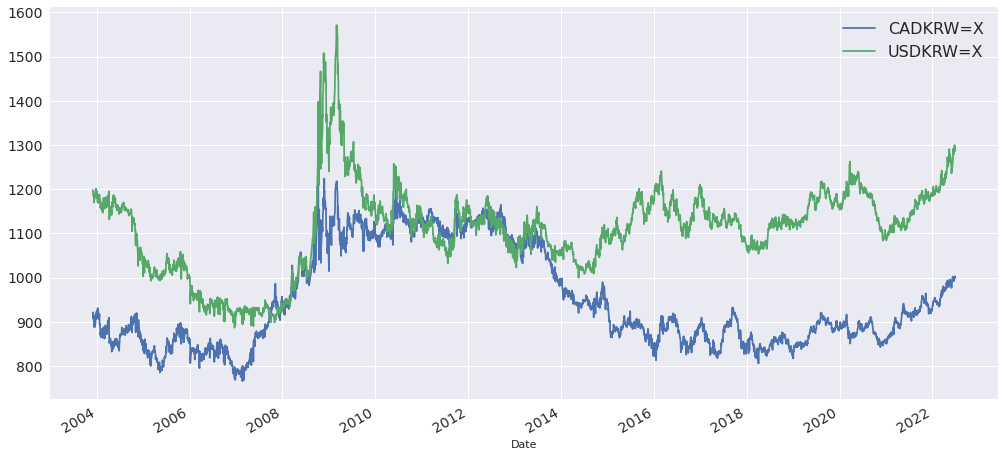

In [181]:
df.plot()

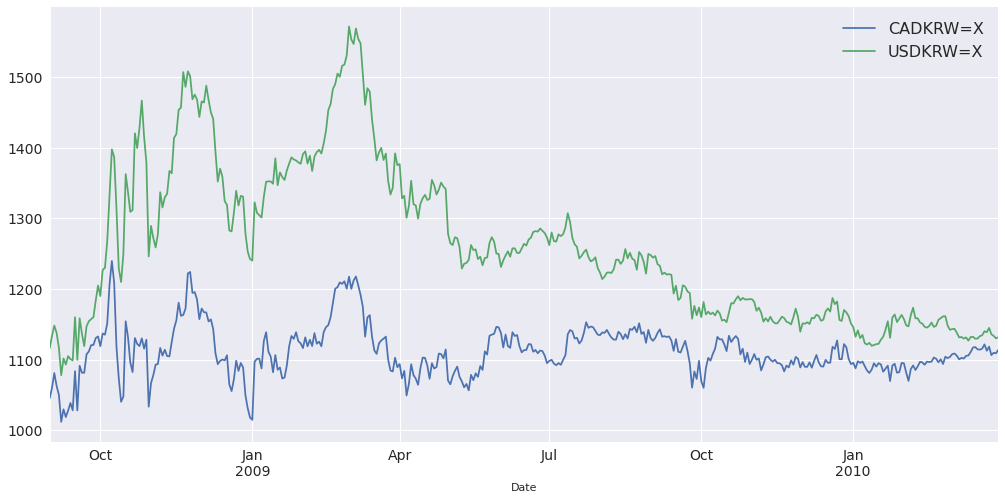

In [182]:
import matplotlib.dates as mdates 

ax = df.loc['2008-09':'2010-03'].plot()
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.show()


In [183]:
df.head()

,CADKRW=X,USDKRW=X
Date,,
2003-12-01,918.719971,1198.400024
2003-12-02,921.409973,1195.000000
2003-12-03,917.010010,1192.500000
2003-12-04,907.510010,1190.099976
2003-12-05,908.460022,1184.699951


## USD | CAD - KRW. 2004 - 
On global crisis, USD spikes at the faster rate than CAD.

<AxesSubplot:xlabel='Date'>

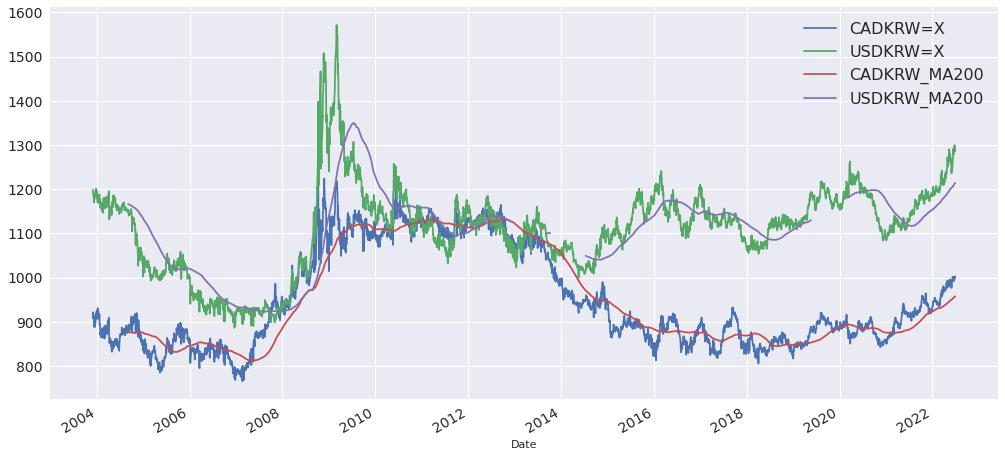

In [184]:
df["CADKRW_MA200"] = df["CADKRW=X"].rolling(200).mean()
df["USDKRW_MA200"] = df["USDKRW=X"].rolling(200).mean()
df.plot()

## Fed Rate - USDKRW


In [185]:
fed_rate = pd.read_csv('./fed_rates_1954_2022.csv', parse_dates=['observation_date'], index_col='observation_date')
fed_rate

,FEDFUNDS
observation_date,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2022-01-01,0.08
2022-02-01,0.08
2022-03-01,0.20


In [186]:
df["rates"] = fed_rate
df

,CADKRW=X,USDKRW=X,CADKRW_MA200,USDKRW_MA200,rates
Date,,,,,
2003-12-01,918.719971,1198.400024,NaN,NaN,0.98
2003-12-02,921.409973,1195.000000,NaN,NaN,NaN
2003-12-03,917.010010,1192.500000,NaN,NaN,NaN
2003-12-04,907.510010,1190.099976,NaN,NaN,NaN
2003-12-05,908.460022,1184.699951,NaN,NaN,NaN
...,...,...,...,...,...
2022-06-23,1000.971924,1297.680054,956.185935,1212.073152,NaN
2022-06-24,1000.739136,1299.810059,956.552299,1212.700102,NaN
2022-06-27,998.790527,1288.290039,956.920307,1213.236002,NaN


## Rate, oil on USD, CAD, and KRW
- Are fed rate and oil price leading or lagging indicator?
- How are they interact with three currencies?

In [187]:
rate = pd.read_csv('./fed_rates_1954_2022.csv', parse_dates=['observation_date'], index_col='observation_date')
rate.rename({ "FEDFUNDS": "fed_rate"}, axis=1, inplace=True)
rate

,fed_rate
observation_date,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2022-01-01,0.08
2022-02-01,0.08
2022-03-01,0.20


In [188]:
oil = pd.read_csv('./crude_oil_prices_brent_europe_1987_2022.csv', parse_dates=['DATE'], index_col='DATE')
oil.rename({"DCOILBRENTEU": "oil_price"}, axis=1, inplace=True)
oil

,oil_price
DATE,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-06-07,126.89
2022-06-08,129.2
2022-06-09,128.47


In [189]:
usdkrw = pd.read_csv('./usdkor_daily_1981_2022.csv', parse_dates=['DATE'], index_col='DATE')
usdkrw.rename({"DEXKOUS": "usd_krw"}, axis=1, inplace=True)
usdkrw

,usd_krw
DATE,
1981-04-13,675.40
1981-04-14,676.70
1981-04-15,676.70
1981-04-16,676.70
1981-04-17,676.75
...,...
2022-06-20,.
2022-06-21,1293.25
2022-06-22,1297.21


In [190]:
usdcad = pd.read_csv('./cadusd_daily_1971_2022.csv', parse_dates=["DATE"], index_col='DATE')
usdcad.rename({"DEXCAUS": "usd_cad"}, axis=1, inplace=True)
usdcad

,usd_cad
DATE,
1971-01-04,1.0109
1971-01-05,1.0102
1971-01-06,1.0106
1971-01-07,1.0148
1971-01-08,1.0154
...,...
2022-06-20,.
2022-06-21,1.2927
2022-06-22,1.2932


In [191]:
df = pd.DataFrame()
df.index = pd.date_range(start='1954-07-01', end='2022-06-24')
df.index.name = 'date'
df

""
date
1954-07-01
1954-07-02
1954-07-03
1954-07-04
1954-07-05
...
2022-06-20
2022-06-21
2022-06-22


In [192]:
df["fed_rate"] = fed_rate
df["oil_price"] = oil
df["usd_krw"] = usdkrw
df["usd_cad"] = usdcad
df

,fed_rate,oil_price,usd_krw,usd_cad
date,,,,
1954-07-01,0.8,NaN,NaN,NaN
1954-07-02,NaN,NaN,NaN,NaN
1954-07-03,NaN,NaN,NaN,NaN
1954-07-04,NaN,NaN,NaN,NaN
1954-07-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-06-20,NaN,NaN,.,.
2022-06-21,NaN,NaN,1293.25,1.2927
2022-06-22,NaN,NaN,1297.21,1.2932


In [193]:
df.fed_rate.ffill(inplace=True)

In [194]:
def isnumber(x):
    try:
        float(x)
        return True
    except:
        return False

# if you filter a dataframe with boolean df, the cells with False will be replaced with NaN
df = df[df.applymap(isnumber)]

In [195]:
# convert string into number
df = df.applymap(float)

<AxesSubplot:xlabel='date'>

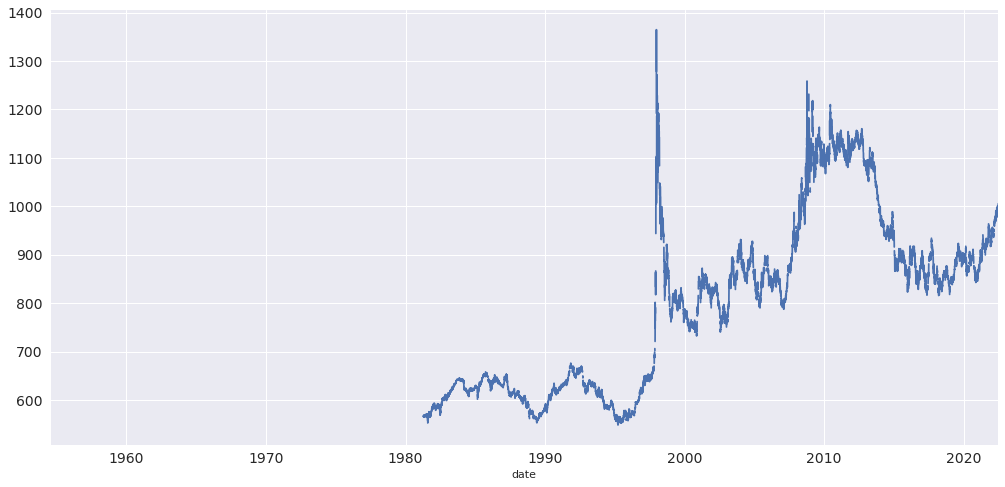

In [196]:
df["cad_krw"] = df.usd_krw / df.usd_cad
df["cad_krw"].plot()

<AxesSubplot:xlabel='date'>

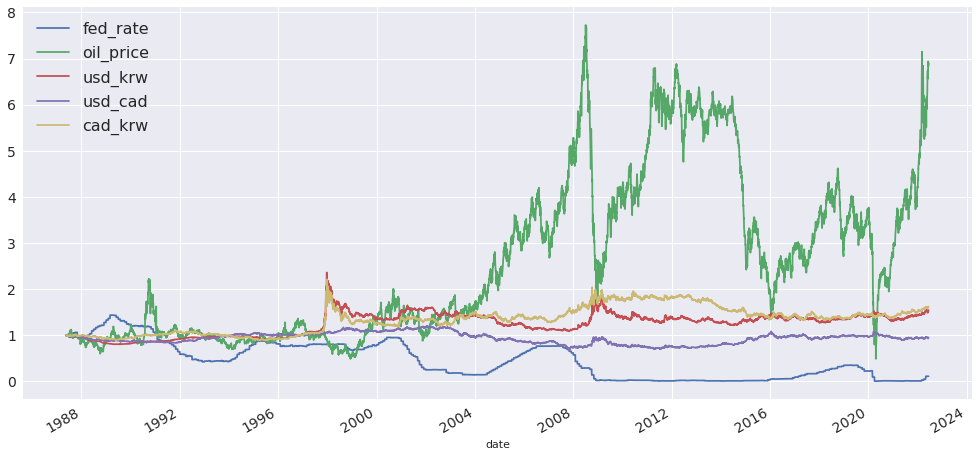

In [197]:
# normalize with the starting value
df = df.dropna()
df = df / df.iloc[0]
df.plot()

<AxesSubplot:xlabel='date'>

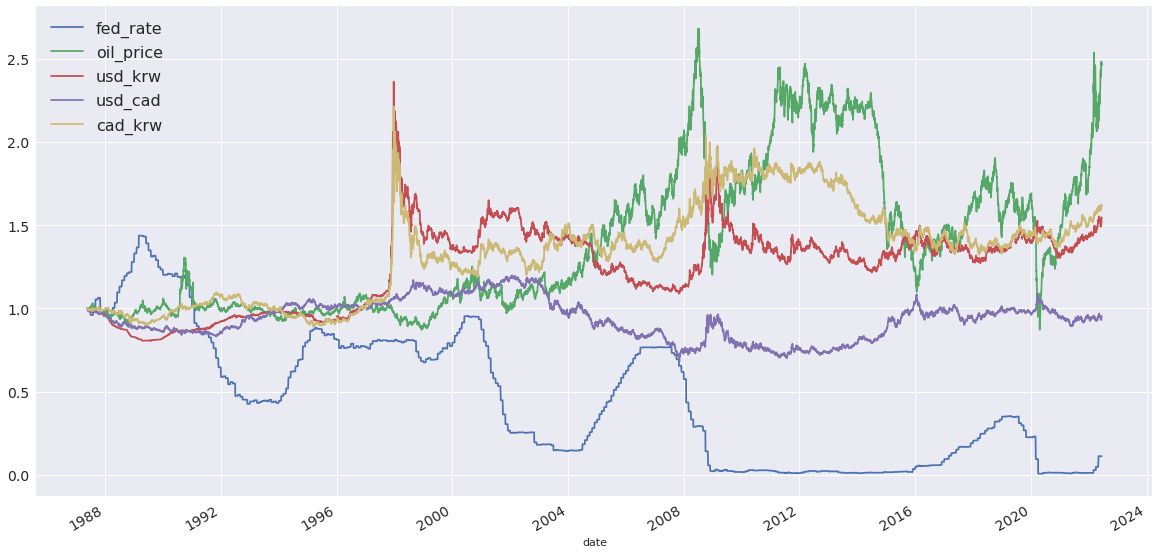

In [198]:
# scale down oil to see them better
df.oil_price = df.oil_price / 4 + 0.75
df.plot(figsize=(20, 10))